***Milk Quality Prediction Using Machine Learning ***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_csv('/content/drive/MyDrive/milknew.csv')

In [53]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [54]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2
1058,8.6,55,0,1,1,1,255,0


In [45]:
df['Grade'].unique()

array([2, 0, 1])

In [46]:
df=df.replace({'high': 2, 'medium': 1,'low': 0})

**Visualization**

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Piechart by Grades

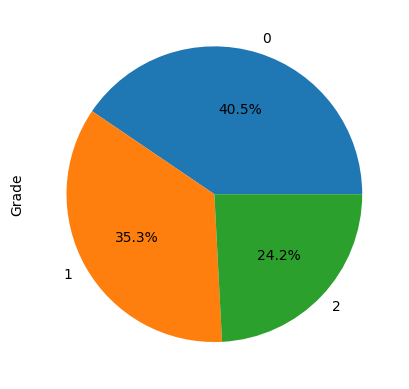

In [30]:
df.groupby('Grade')['Grade'].count().plot.pie(autopct="%1.1f%%");

Grade high occupies 24%, medium occupies 35% and low occupies 41%.

Boxplot of 'pH', 'Temprature' and 'Colour' by Grades

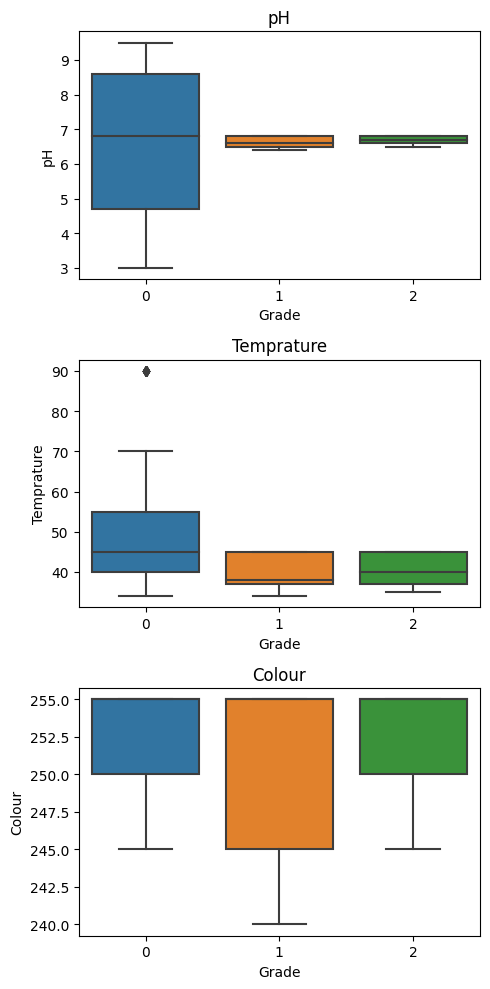

In [31]:
col_list=['pH', 'Temprature', 'Colour']

fig = plt.figure(figsize=(5,10))

for i in range(len(col_list)):
    plt.subplot(3,1,i+1)
    plt.title(col_list[i])
    sns.boxplot(data=df,y=df[col_list[i]],x=df['Grade'])

plt.tight_layout()

In pH and temperature, we can find difference between low and others. And in colours, medium has wider range than others.

Barplot of 'Taste', 'Odor', 'Fat ' and 'Turbidity' by Grades

In [32]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

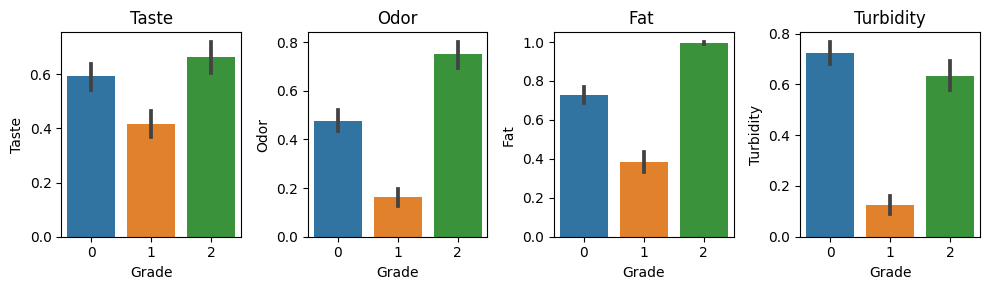

In [33]:
col_list=['Taste', 'Odor', 'Fat ','Turbidity']

fig = plt.figure(figsize=(10,3))

for i in range(len(col_list)):
    plt.subplot(1,4,i+1)
    plt.title(col_list[i])
    sns.barplot(data=df,y=df[col_list[i]],x=df['Grade'])

plt.tight_layout();

These plots show that medium is lowest in all four features. It may mean that these four features do not have huge impact to split 'high' and 'low' grade.

Pairplot

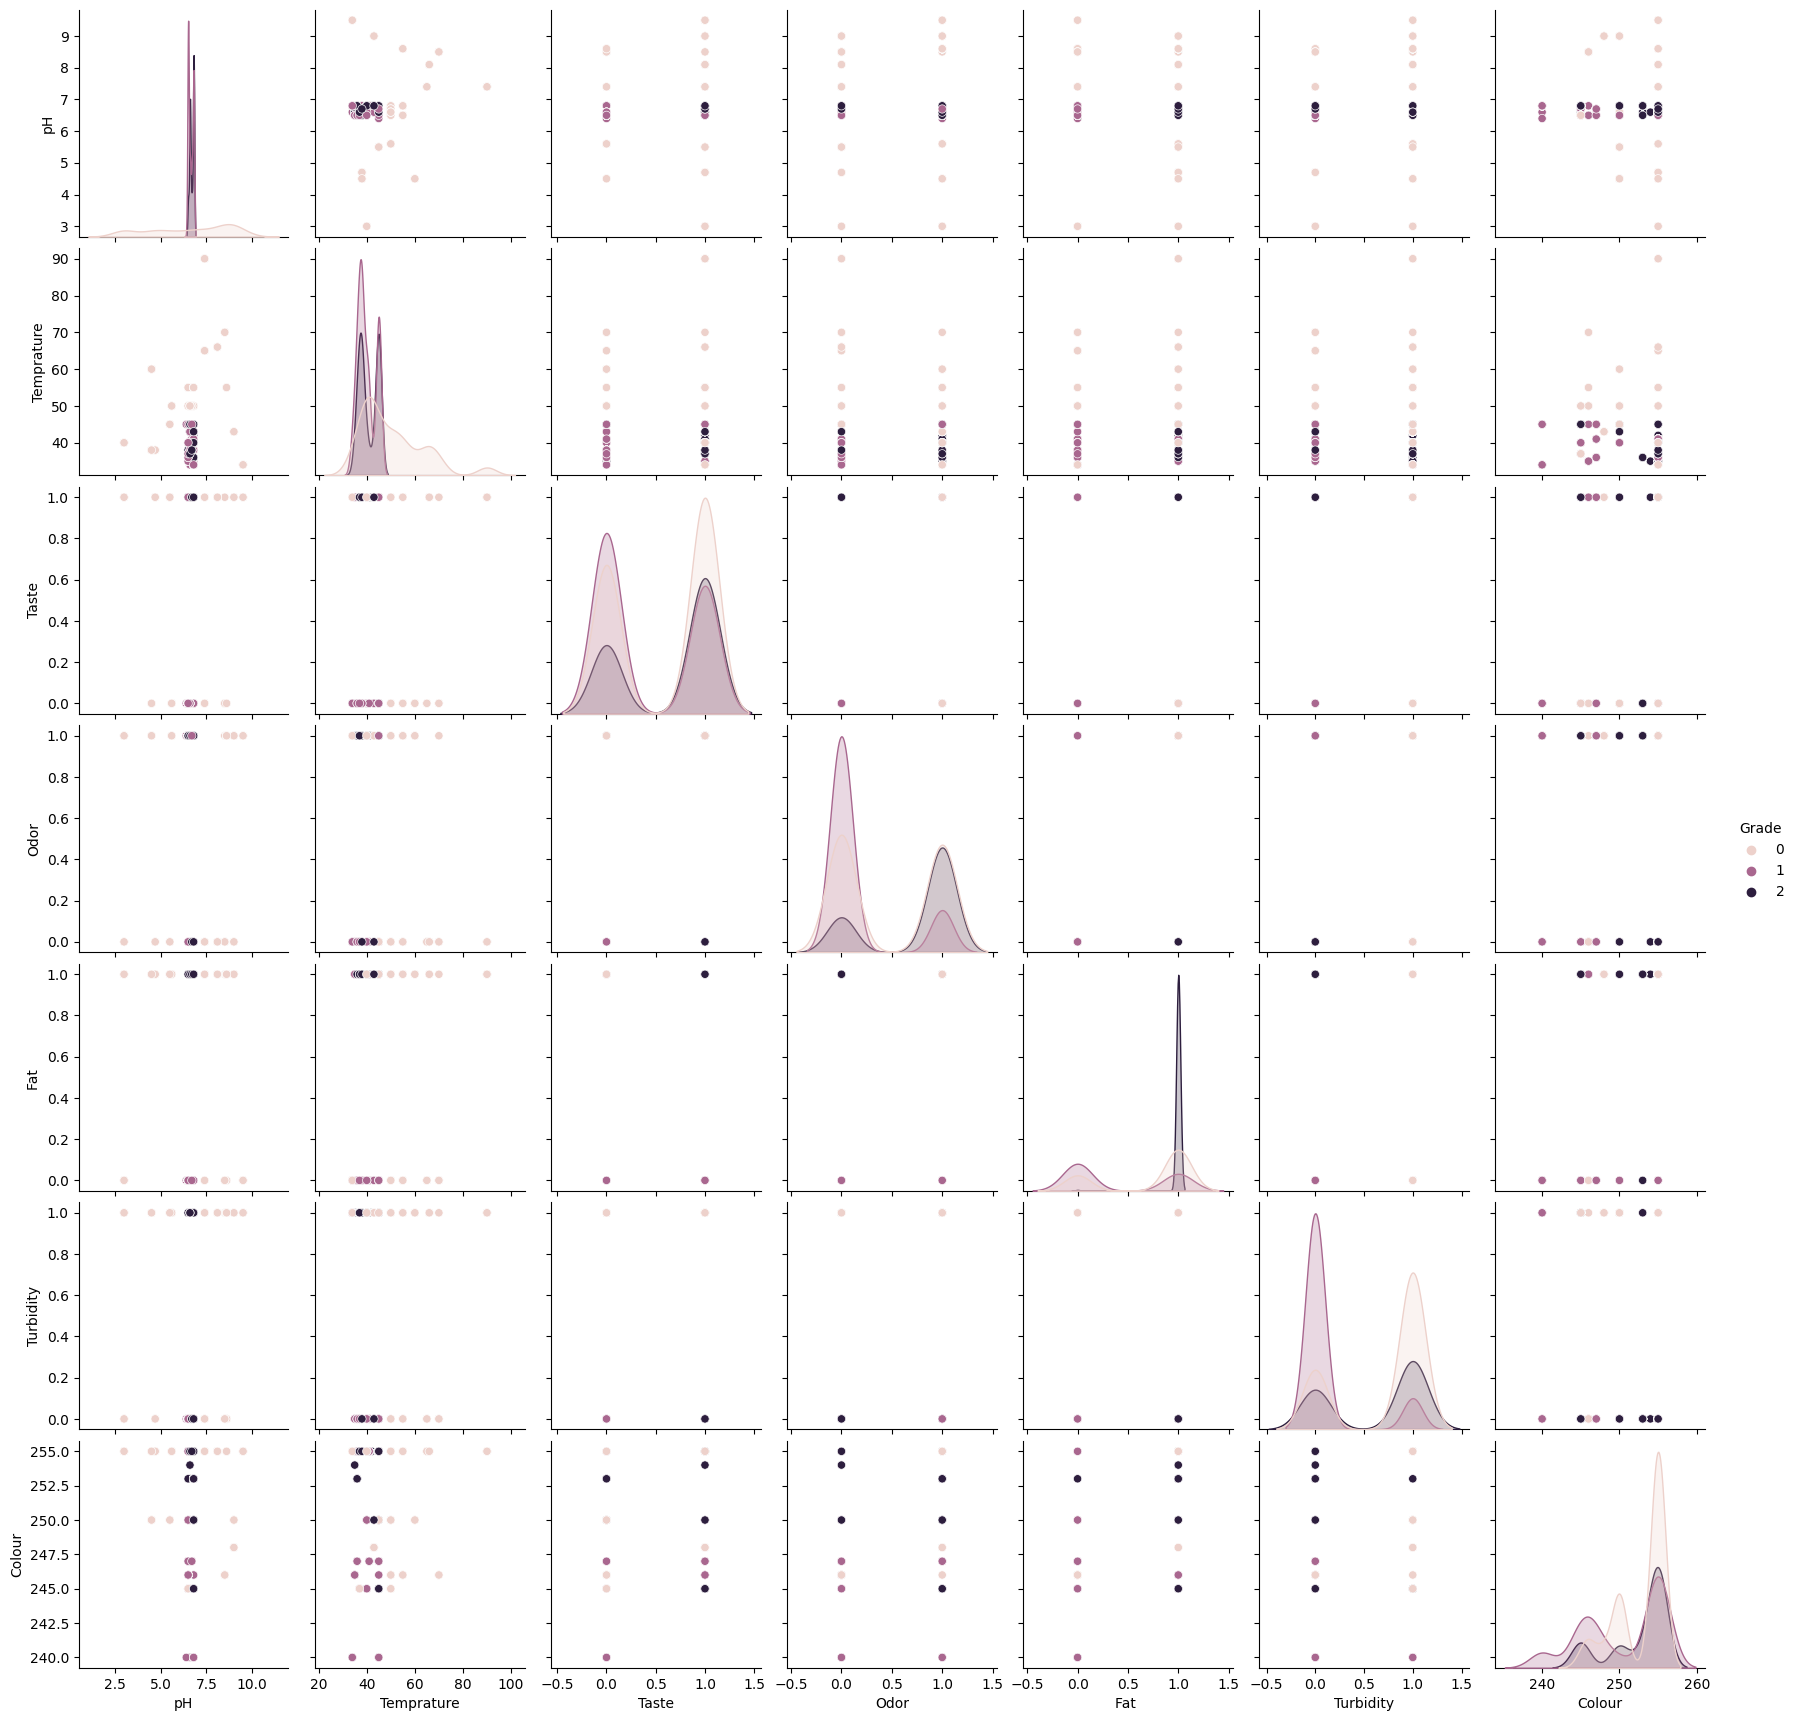

In [34]:
sns.pairplot(df,hue='Grade');

Heatmap of correlation

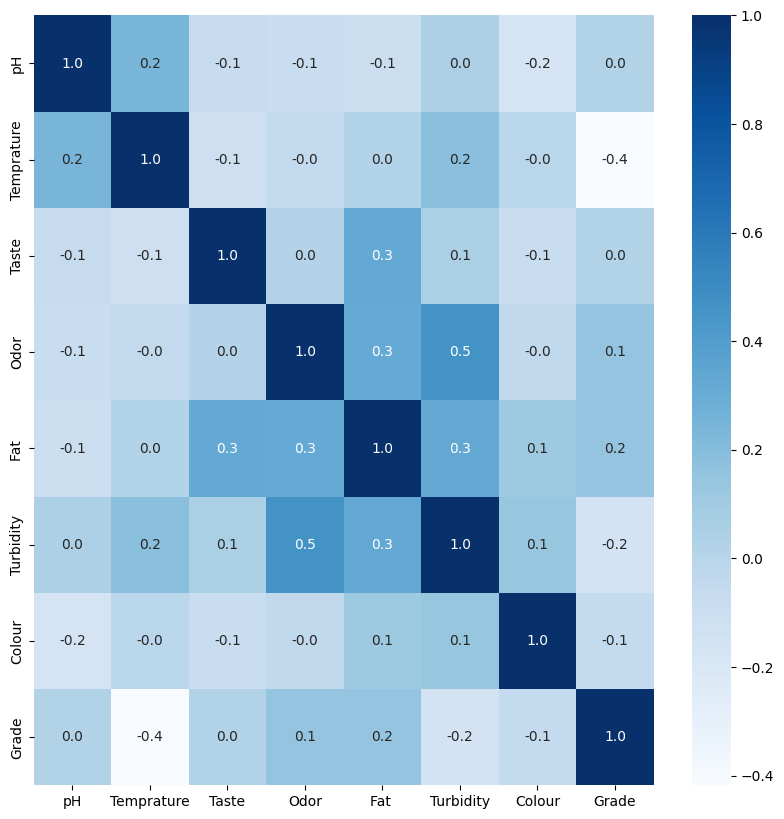

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

Odor and turbidity have a little bit strong correlation (0.5). And there are no other strong correlations among features.

Classify Modeling

In [14]:
df.shape

(1059, 8)

In [70]:
y = df.pop('Grade')
x = df

In [71]:
y.value_counts(1)

0    0.405099
1    0.353163
2    0.241737
Name: Grade, dtype: float64

**Model Building**

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

**SVM**

In [74]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [75]:
print("Training Accuracy :",svc.score(x_train,y_train))
print("Testing Accuracy :",svc.score(x_test,y_test))

Training Accuracy : 0.5479082321187584
Testing Accuracy : 0.5345911949685535


Text(0.5, 1.03, 'Confusion Matrix for SVM')

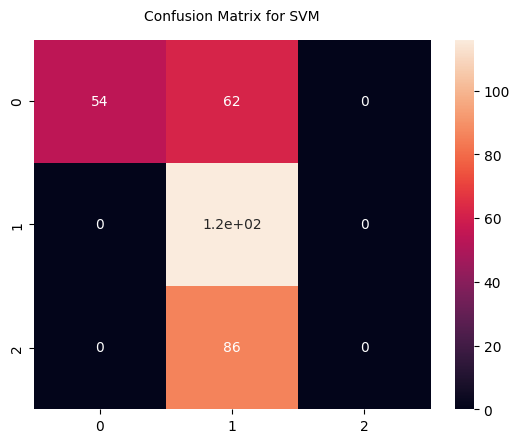

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_svc = svc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM", fontsize=10, y=1.03)

In [77]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64       116
           1       0.44      1.00      0.61       116
           2       0.00      0.00      0.00        86

    accuracy                           0.53       318
   macro avg       0.48      0.49      0.42       318
weighted avg       0.53      0.53      0.45       318



**Decision Tree**

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [79]:
print("Training Accuracy :",dtc.score(x_train,y_train))
print("Testing Accuracy :",dtc.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for DecisionTreeClassifier')

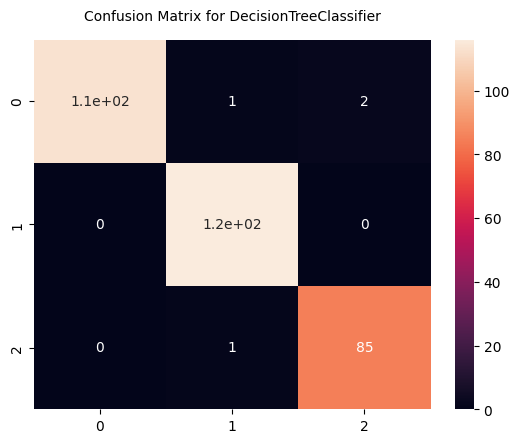

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_dtc = dtc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for DecisionTreeClassifier", fontsize=10, y=1.03)

In [81]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.98      1.00      0.99       116
           2       0.98      0.99      0.98        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



**Random Forest**

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
print("Training Accuracy :",rfc.score(x_train,y_train))
print("Testing Accuracy :",rfc.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for RandomForestClassifier')

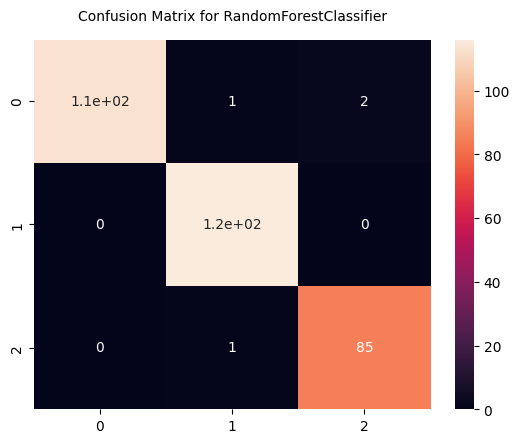

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for RandomForestClassifier", fontsize=10, y=1.03)

In [85]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.98      1.00      0.99       116
           2       0.98      0.99      0.98        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



**Gaussian Naive Bias**

In [86]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [87]:
print("Training Accuracy :",nb.score(x_train,y_train))
print("Testing Accuracy :",nb.score(x_test,y_test))

Training Accuracy : 0.8421052631578947
Testing Accuracy : 0.8081761006289309


Text(0.5, 1.03, 'Confusion Matrix for GaussianNB')

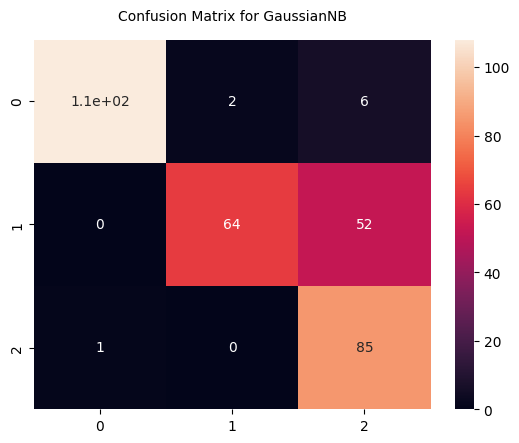

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_nb = nb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for GaussianNB", fontsize=10, y=1.03)

In [89]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       116
           1       0.97      0.55      0.70       116
           2       0.59      0.99      0.74        86

    accuracy                           0.81       318
   macro avg       0.85      0.82      0.80       318
weighted avg       0.88      0.81      0.81       318



**Linear Regression**

In [90]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [91]:
print("Training Accuracy :",lnr.score(x_train,y_train))
print("Testing Accuracy :",lnr.score(x_test,y_test))

Training Accuracy : 0.2797660354192826
Testing Accuracy : 0.25435465627088993


**Logistic Regression**

In [92]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [93]:
print("Training Accuracy :",lr.score(x_train,y_train))
print("Testing Accuracy :",lr.score(x_test,y_test))

Training Accuracy : 0.7462887989203779
Testing Accuracy : 0.7327044025157232


Text(0.5, 1.03, 'Confusion Matrix for Logistic Regression')

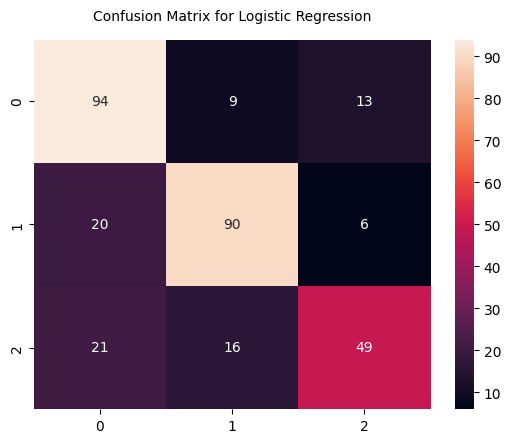

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_lr = lr.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression", fontsize=10, y=1.03)

In [95]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       116
           1       0.78      0.78      0.78       116
           2       0.72      0.57      0.64        86

    accuracy                           0.73       318
   macro avg       0.73      0.72      0.72       318
weighted avg       0.73      0.73      0.73       318



**XgBoost**

In [96]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [97]:
print("Training Accuracy :",xgb.score(x_train,y_train))
print("Testing Accuracy :",xgb.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for XGBClassifierClassifier')

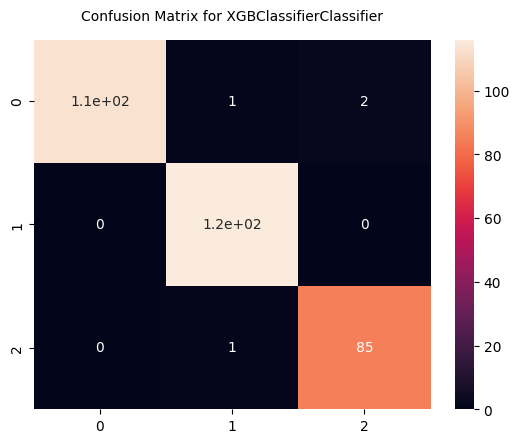

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_xgb = xgb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for XGBClassifierClassifier", fontsize=10, y=1.03)

In [99]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.98      1.00      0.99       116
           2       0.98      0.99      0.98        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



**KNeighbors**

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
print("Training Accuracy :",knn.score(x_train,y_train))
print("Testing Accuracy :",knn.score(x_test,y_test))

Training Accuracy : 0.9919028340080972
Testing Accuracy : 0.9874213836477987


Text(0.5, 1.03, 'Confusion Matrix for KNeighborsClassifier')

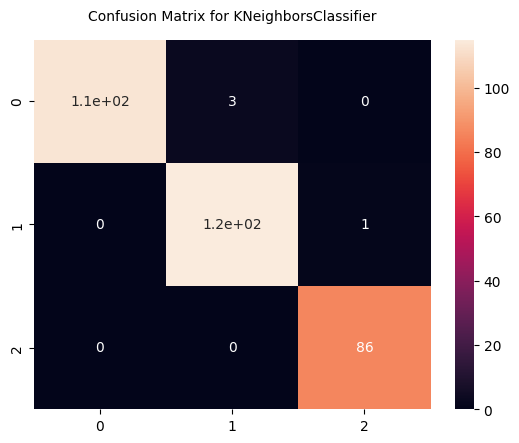

In [102]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_knn = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for KNeighborsClassifier", fontsize=10, y=1.03)

In [103]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.97      0.99      0.98       116
           2       0.99      1.00      0.99        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



**GradientBoosting**

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [105]:
print("Training Accuracy :",gb.score(x_train,y_train))
print("Testing Accuracy :",gb.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9905660377358491


Text(0.5, 1.03, 'Confusion Matrix for GradientBoostingClassifier')

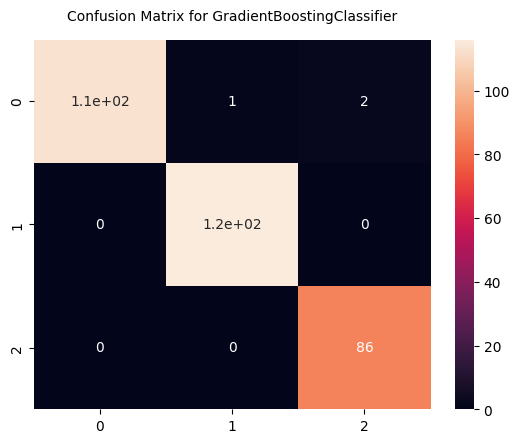

In [106]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_gb = gb.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for GradientBoostingClassifier", fontsize=10, y=1.03)

In [107]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       116
           1       0.99      1.00      1.00       116
           2       0.98      1.00      0.99        86

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



**Artificial neural network**

In [109]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [110]:
# ANN Model Layers
from tensorflow.keras.layers import BatchNormalization
ann_model =Sequential()

ann_model.add(Dense(units = 32,activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))

ann_model.add(Dense(units = 64,activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))

ann_model.add(Dense(units = 1,activation = 'sigmoid'))

# Model Optimizer
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [111]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [113]:
# Training the ANN
history = ann_model.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
47/47 [==============================] - 3s 9ms/step - loss: 0.8542 - accuracy: 0.3873 - val_loss: 8.9226 - val_accuracy: 0.3648
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.5169 - val_loss: 4.4984 - val_accuracy: 0.3648
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.4993 - val_loss: 3.1903 - val_accuracy: 0.3648
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.5236 - val_loss: 1.5749 - val_accuracy: 0.3805
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: -0.0068 - accuracy: 0.5331 - val_loss: 3.4114 - val_accuracy: 0.3459
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: -0.0985 - accuracy: 0.5439 - val_loss: 3.6647 - val_accuracy: 0.3459
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: -0.0940 - accuracy: 0.5358 - val_loss: 0.4259 - val_accuracy: 0.5346
Epoch 8/10

In [114]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

<Axes: >

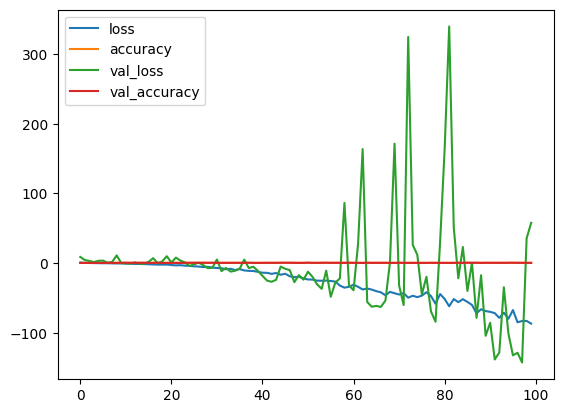

In [115]:
loss_plot = pd.DataFrame(ann_model.history.history)
loss_plot.plot()

In [116]:
#now testing for Test data
y_pred = ann_model.predict(x_test)
y_pred = (y_pred>0.5)
acc_test_ann1 = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
acc_test_ann1

10/10 [==============================] - 0s 2ms/step


38.99

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc_test_ann1 = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',acc_test_ann1)

[[114   2   0]
 [106  10   0]
 [ 53  33   0]]
score is: 0.389937106918239


In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.98      0.59       116
           1       0.22      0.09      0.12       116
           2       0.00      0.00      0.00        86

    accuracy                           0.39       318
   macro avg       0.21      0.36      0.24       318
weighted avg       0.23      0.39      0.26       318



**Prediction**

In [119]:
print(xgb.predict(x_test))

[2 0 1 0 2 1 0 2 2 1 0 2 1 1 2 1 2 2 2 0 2 0 1 2 2 0 2 2 0 1 2 0 0 1 2 2 0
 1 2 0 2 1 2 0 1 0 2 0 1 0 2 1 1 1 0 1 1 0 1 0 1 0 1 2 0 1 0 1 1 2 2 1 1 2
 1 1 1 0 2 1 0 1 1 0 1 1 2 0 2 0 1 2 1 0 2 1 0 2 1 1 2 1 0 1 2 2 2 2 0 0 2
 2 2 2 0 1 0 2 1 2 1 1 0 2 2 0 0 0 1 2 0 1 0 1 2 1 1 1 1 0 1 2 0 0 1 2 0 0
 0 2 0 1 1 0 2 2 1 1 1 1 1 1 0 1 1 2 2 0 2 1 0 0 1 2 2 0 2 2 2 1 1 0 0 0 0
 2 1 2 0 0 2 0 0 0 1 0 1 1 2 1 0 2 1 0 1 1 0 1 1 0 2 1 1 1 1 1 2 1 2 0 2 2
 1 2 1 0 0 1 2 2 2 0 0 2 0 1 0 0 0 2 0 2 0 1 2 0 1 1 0 0 1 0 2 0 0 0 2 0 2
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 2 1 0 0 1 1 0 2 2 0 1 2 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 2 0 2 0]
